In [ ]:
import cv2
print(cv2.__version__)

4.10.0


**TASK**-**1**

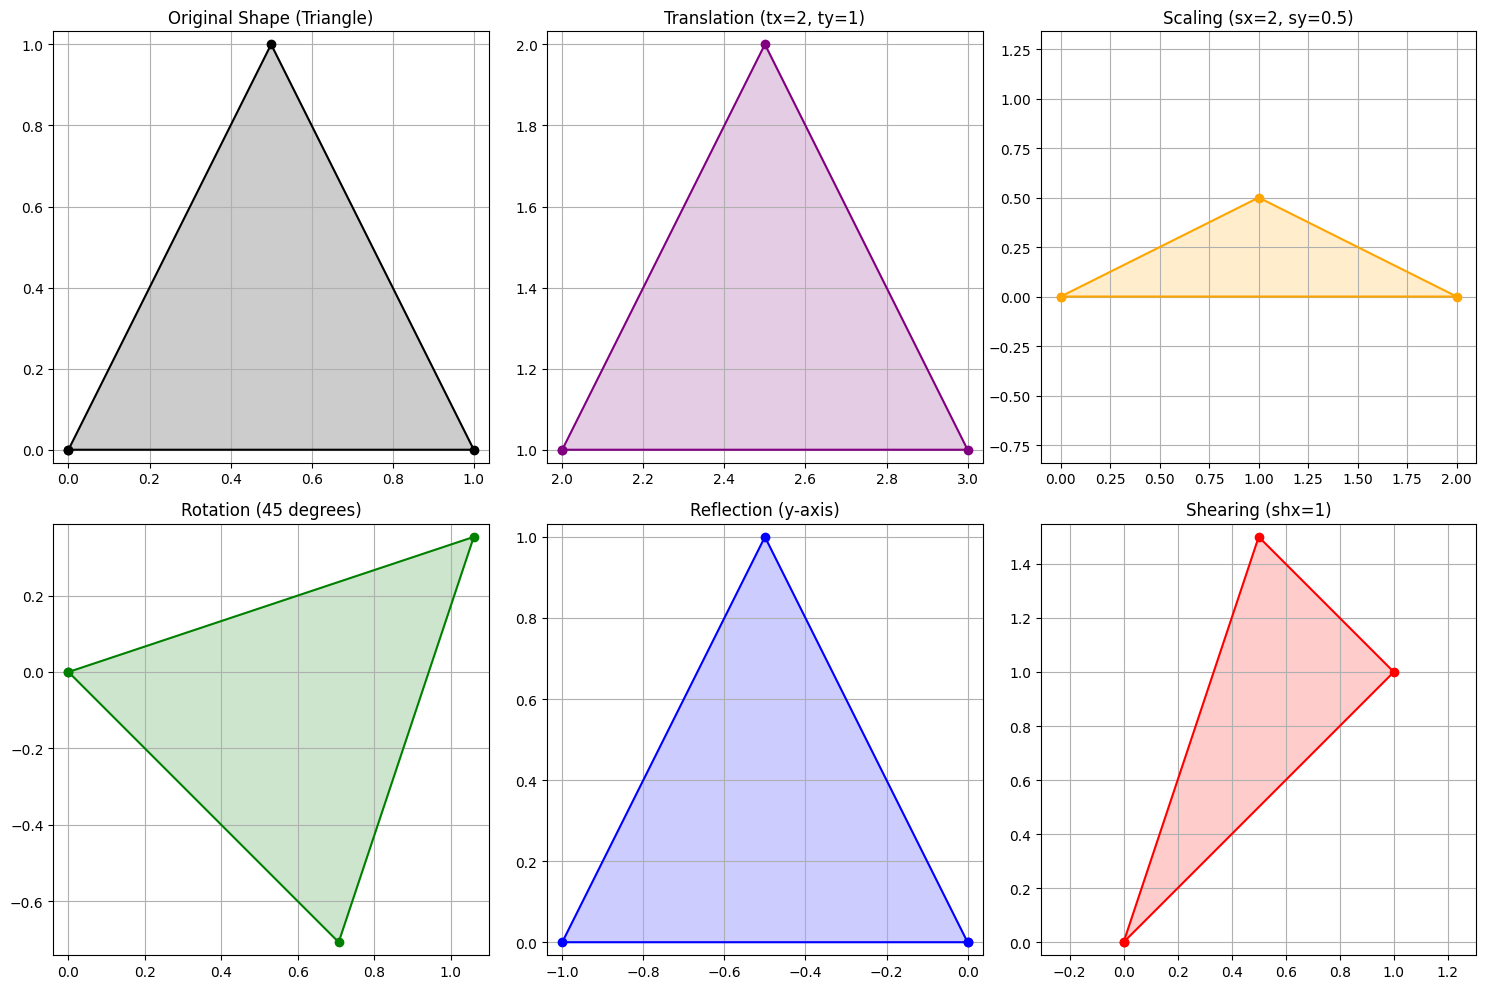

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a simple 2D triangle shape (vertices)
triangle = np.array([[0, 0], [1, 0], [0.5, 1]])

def plot_shape(ax, points, title, color='blue'):
    """Plot the given shape on the provided axis."""
    # Close the shape by appending the first point at the end
    closed_points = np.vstack([points, points[0]])
    ax.plot(closed_points[:, 0], closed_points[:, 1], marker='o', color=color)
    ax.fill(closed_points[:, 0], closed_points[:, 1], alpha=0.2, color=color)
    ax.set_title(title)
    ax.axis('equal')
    ax.grid(True)

def translate(points, tx, ty):
    """Translate the shape by tx and ty."""
    translation_matrix = np.array([tx, ty])
    return points + translation_matrix

def scale(points, sx, sy):
    """Scale the shape by sx and sy."""
    scaling_matrix = np.array([[sx, 0], [0, sy]])
    return np.dot(points, scaling_matrix)

def rotate(points, angle_degrees):
    """Rotate the shape by the given angle in degrees."""
    theta = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    return np.dot(points, rotation_matrix)

def reflect(points, axis='x'):
    """Reflect the shape across the specified axis."""
    if axis == 'x':
        reflection_matrix = np.array([[1, 0], [0, -1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0], [0, 1]])
    else:  # Reflection through the origin
        reflection_matrix = np.array([[-1, 0], [0, -1]])
    return np.dot(points, reflection_matrix)

def shear(points, shx=0, shy=0):
    """Shear the shape along the x or y axis."""
    shear_matrix = np.array([[1, shx], [shy, 1]])
    return np.dot(points, shear_matrix)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot transformations
plot_shape(axes[0, 0], triangle, "Original Shape (Triangle)", color='black')
plot_shape(axes[0, 1], translate(triangle, 2, 1), "Translation (tx=2, ty=1)", color='purple')
plot_shape(axes[0, 2], scale(triangle, 2, 0.5), "Scaling (sx=2, sy=0.5)", color='orange')
plot_shape(axes[1, 0], rotate(triangle, 45), "Rotation (45 degrees)", color='green')
plot_shape(axes[1, 1], reflect(triangle, 'y'), "Reflection (y-axis)", color='blue')
plot_shape(axes[1, 2], shear(triangle, 1, 0), "Shearing (shx=1)", color='red')

plt.tight_layout()
plt.show()


**TASK**-**2**

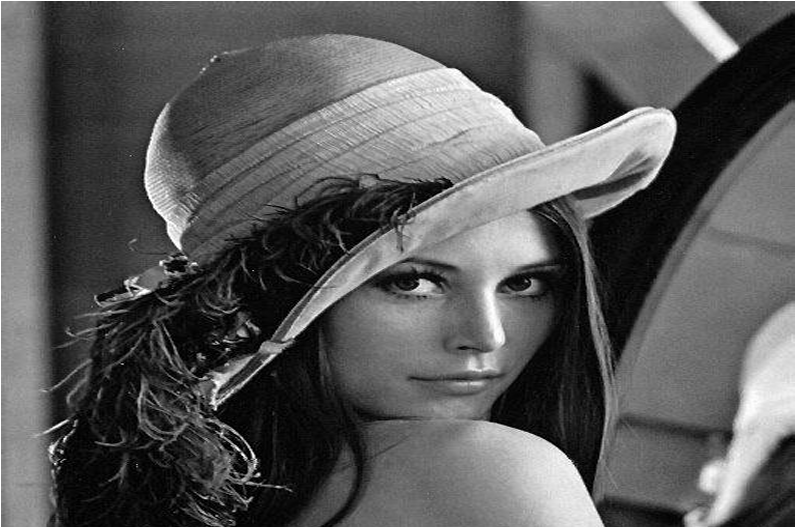

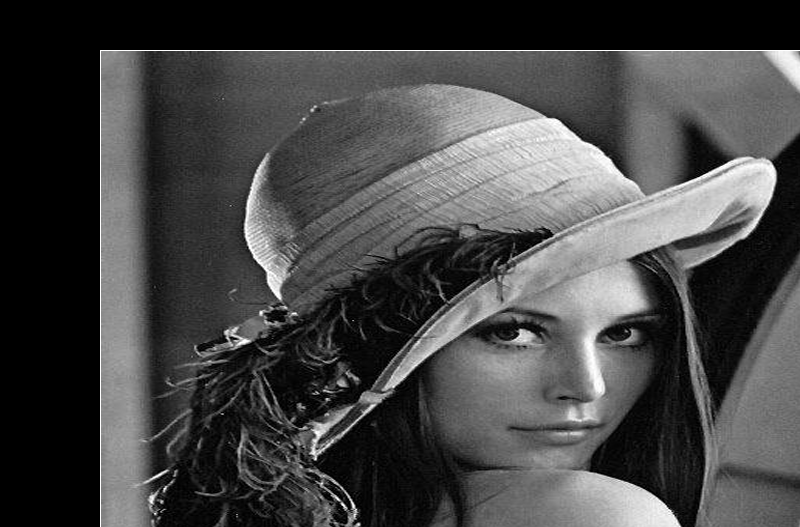

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/Screenshot 2025-01-28 112114.png')
height, width = image.shape[:2]
tx, ty = 100, 50
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

translated_image = cv2.warpAffine(image, translation_matrix, (width, height))
cv2_imshow(image)
cv2_imshow(translated_image)
cv2.imwrite('translated_image.jpg', translated_image)

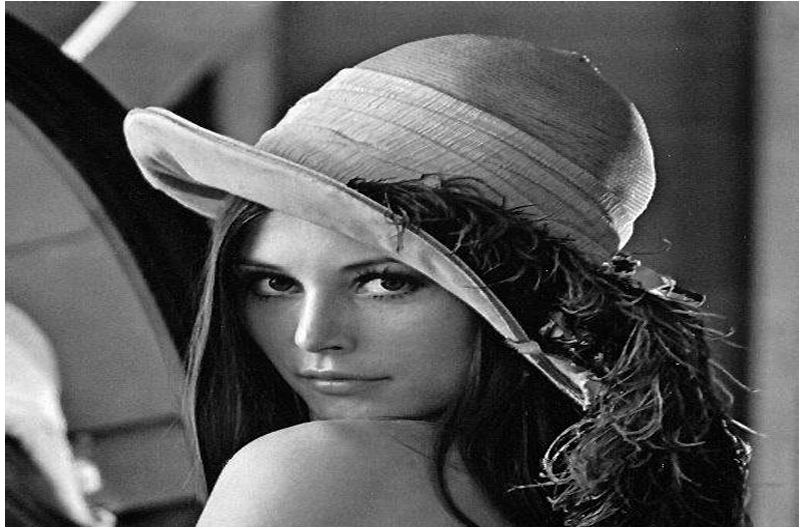

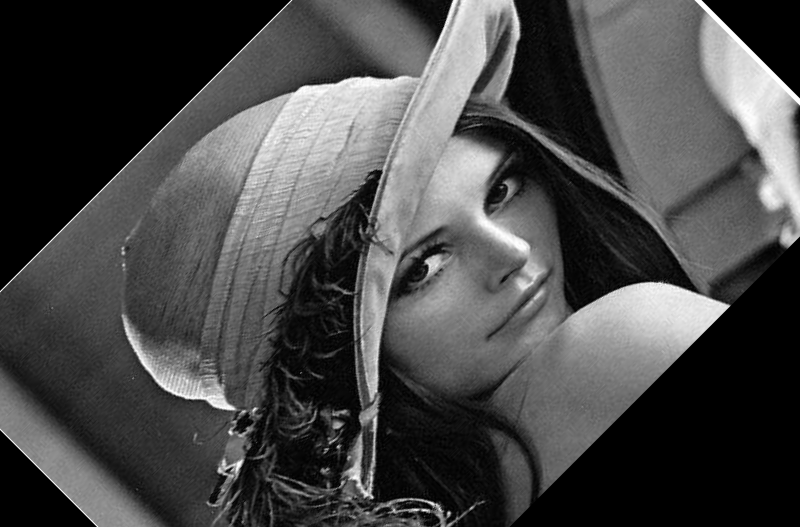

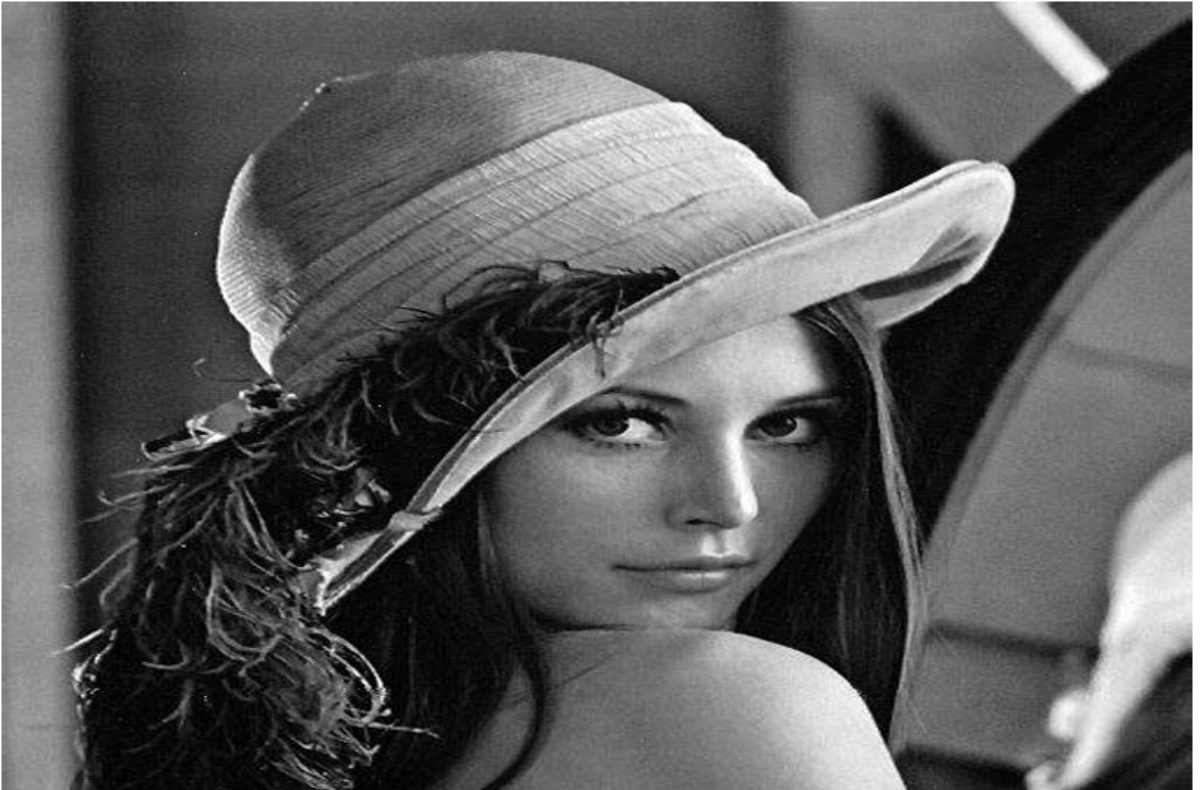

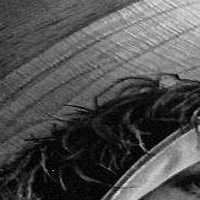

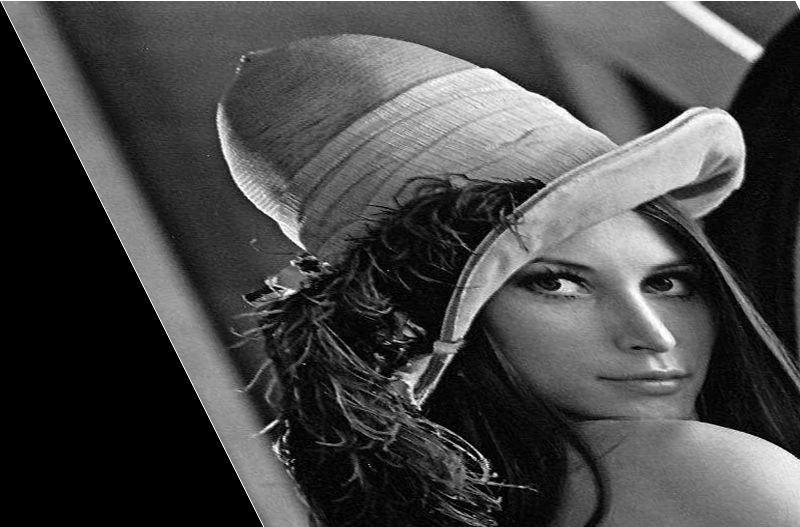

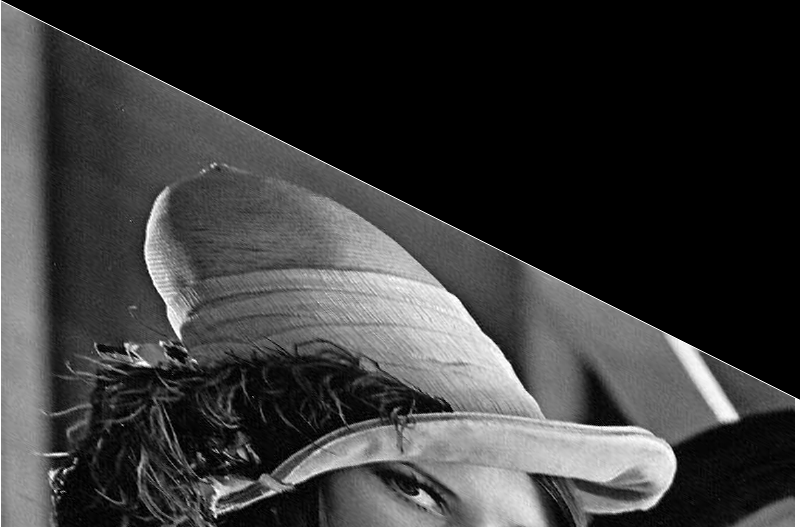

In [ ]:
#Reflection
reflected_image = cv2.flip(image, 1)
cv2_imshow(reflected_image)

#Rotate
center = (width / 2, height / 2)
rotation_matrix =cv2.getRotationMatrix2D(center, 45, 1)
rotated_image =cv2.warpAffine(image, rotation_matrix, (width, height))
cv2_imshow(rotated_image)

#Scale
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5,interpolation=cv2.INTER_LINEAR)
cv2_imshow(scaled_image)

#crop
crop_image=image[100:300, 200:400]
cv2_imshow(crop_image)

#shearing in x-axis
shear_matrix = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
cv2_imshow(sheared_image)

#shearing in y-axis
shear_matrix = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
cv2_imshow(sheared_image)